# Statmodels OLS Example

### Hosing Prices

In [112]:
# Import Necessary Librearies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, explained_variance_score
import warnings
warnings.filterwarnings('ignore')

In [113]:
# configuration
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: f"{x:.3f}")
sns.set_theme(style="darkgrid")

plt.rcParams.update({
    "axes.titlesize": 10,
    "axes.labelsize": 9,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8 
})

RANDOM_STATE = 42
CSV_PATH = "data/Housing2.csv"
TARGET_COL = "price"

### Step 1: Load Dataset

In [114]:
df = pd.read_csv(CSV_PATH)

In [115]:
print("Initial Dataset Shape:", df.shape)
display("Features Overview", df.head())

Initial Dataset Shape: (545, 13)


'Features Overview'

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Step 2: Encode Categorical Feature

In [116]:
categorical_cols = df.select_dtypes(include='str').columns.to_list()
numerical_cols = df.select_dtypes(exclude='str').columns.to_list()
# print
print("Target column:",TARGET_COL)
print(f"Categorical Feature {categorical_cols}")
print(f"Numerical Feature: {numerical_cols}")

Target column: price
Categorical Feature ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
Numerical Feature: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']


In [117]:
df_cat = df[categorical_cols]

encoder = OneHotEncoder(drop='first', sparse_output=False)

encoded_data = encoder.fit_transform(df_cat)

encode_df_cat = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

df_final = pd.merge(df[numerical_cols], encode_df_cat, left_index=True, right_index=True)

In [118]:
X = df_final.drop(columns=[TARGET_COL])
y = df_final[TARGET_COL]

## Step 3: Exploratory Data Analysis (EDA)

### Handling missing values and show misisng data count

In [119]:
missing_values = df.isnull().sum().sort_values(ascending=False)
print("Missing Values Features:\n", missing_values)

Missing Values Features:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [120]:
# duplicates
duplicate_mask = df.duplicated()
num_duplicates = duplicate_mask.sum()
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 0


### Plot the distribution of the target variable (Price)

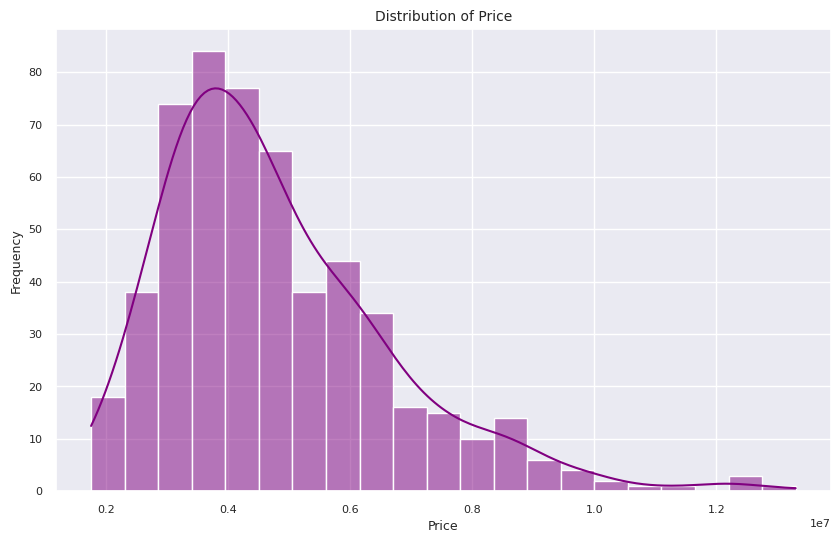

In [121]:
plt.figure(figsize=(10,6))
sns.histplot(x=df[TARGET_COL], kde=True, color='purple')
plt.title('Distribution of Price')
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

### Correlation Heatmap for numerical features

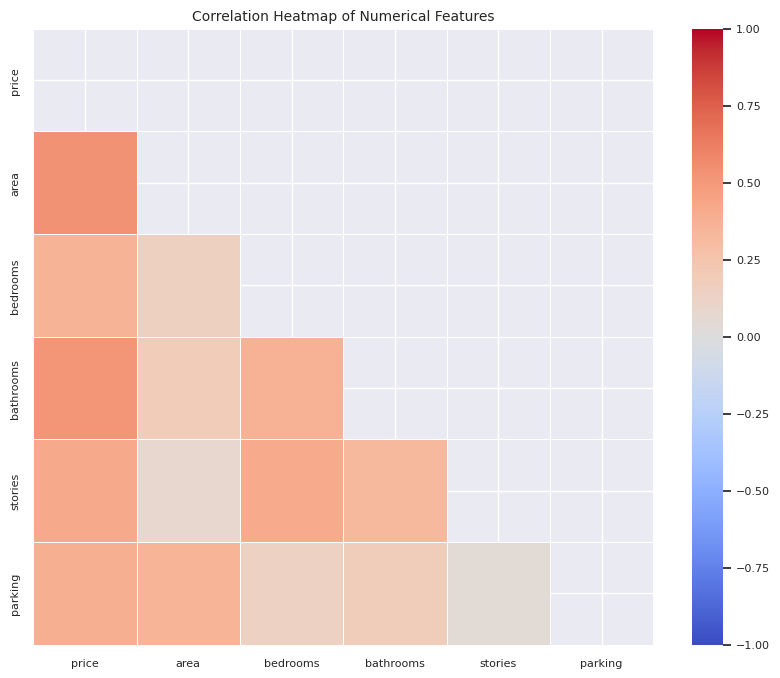

In [122]:
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(df[numerical_cols].corr(), dtype=bool))
sns.heatmap(data=df[numerical_cols].corr(), mask=mask, annot=False, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

## Step 3: Spliting the Data into Training and Testing Sets

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

## Step 4: Statsmodel OLS

In [124]:
X_train = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     70.90
Date:                Sun, 08 Feb 2026   Prob (F-statistic):           2.16e-97
Time:                        12:16:46   Log-Likelihood:                -6635.2
No. Observations:                 436   AIC:                         1.330e+04
Df Residuals:                     422   BIC:                         1.336e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              2.6e+05   2.74e+05      0.949      0.343   -2.79e+05    7.99e+05
area                              235.9688     24.903      9.476      0.000     187.020     284.918
bedrooms                         7.678e+04   7.54e+04      1.018      0.309   -7.14e+04    2.25e+05
bathrooms                        1.094e+06   1.14e+05      9.564      0.000     8.7e+05    1.32e+06
stories                          4.075e+05   6.88e+04      5.919      0.000    2.72e+05    5.43e+05
parking                          2.248e+05   6.18e+04      3.639      0.000    1.03e+05    3.46e+05
mainroad_yes                     3.679e+05   1.49e+05      2.464      0.014    7.44e+04    6.61e+05
guestroom_yes                    2.316e+05   1.41e+05      1.648      0.100   -4.47e+04    5.08e+05
basement_yes                     3.903e+05   1.18e+05      3.320      0.001    1.59e+05    6.21e+05
hotwaterheating_yes              6.846e+05   2.23e+05      3.070      0.002    2.46e+05    1.12e+06
airconditioning_yes              7.914e+05   1.17e+05      6.772      0.000    5.62e+05    1.02e+06
prefarea_yes                     6.299e+05   1.21e+05      5.205      0.000    3.92e+05    8.68e+05
furnishingstatus_semi-furnished -1.269e+05   1.22e+05     -1.041      0.299   -3.66e+05    1.13e+05
furnishingstatus_unfurnished    -4.136e+05   1.34e+05     -3.077      0.002   -6.78e+05   -1.49e+05
==============================================================================
Omnibus:                       74.015   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.938
Skew:                           0.833   Prob(JB):                     2.10e-42
Kurtosis:                       5.791   Cond. No.                     3.48e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [125]:
X_test = sm.add_constant(X_test)
ypred = model.predict(X_test)
print(ypred)

316   5164653.900
77    7224722.298
360   3109863.242
90    4612075.327
493   3294646.257
          ...    
15    4973331.100
357   4336650.869
39    7059062.723
54    6398940.868
155   6363889.853
Length: 109, dtype: float64


**R-Squared Calculation**

In [126]:
def evaluate_model(y_true, y_pred, dataset_type="Training"):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    explain_var = explained_variance_score(y_true, y_pred)
    print(f"{dataset_type} Set Performace:")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R-squared (R^2): {r2:.2f}")
    print(f"Explained Variance Score: {explain_var:.2f}\n")
    
evaluate_model(y_test, ypred, dataset_type="Testing")

Testing Set Performace:
Mean Squared Error (MSE): 1754318687330.67
Mean Absolute Error (MAE): 970043.40
R-squared (R^2): 0.65
Explained Variance Score: 0.66



In [132]:
df_result = pd.DataFrame({'Actual':y_test,'Predict':ypred})
df_result['Error'] = df_result['Actual'] - df_result['Predict']
df_result['Error'] = df_result['Error'].abs()
df_result

,Actual,Predict,Error
316,4060000,5164653.900,1104653.900
77,6650000,7224722.298,574722.298
360,3710000,3109863.242,600136.758
90,6440000,4612075.327,1827924.673
493,2800000,3294646.257,494646.257
...,...,...,...
15,9100000,4973331.100,4126668.900
357,3773000,4336650.869,563650.869
39,7910000,7059062.723,850937.277
54,7350000,6398940.868,951059.132


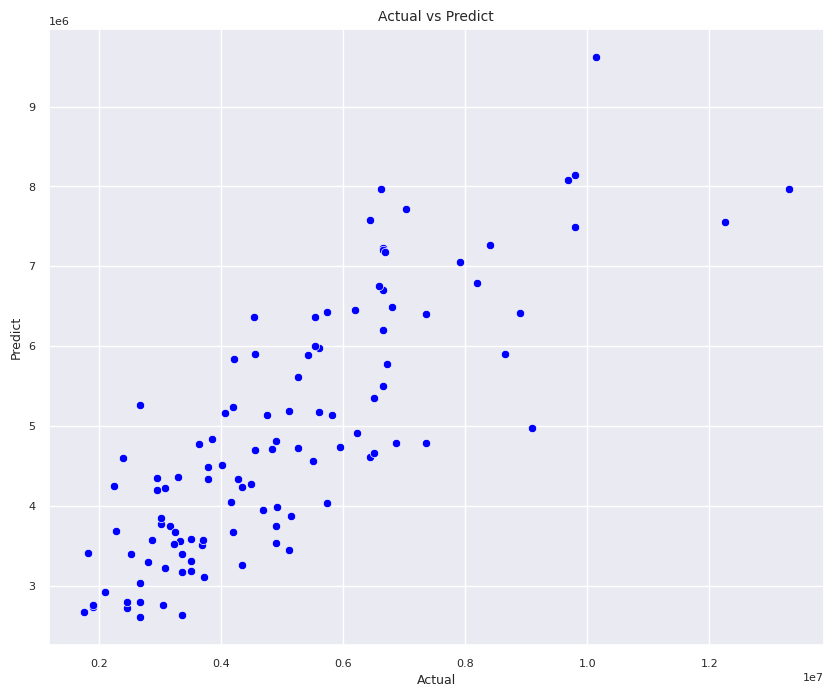

In [134]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=df_result['Actual'], y=df_result['Predict'], color='blue')
plt.xlabel('Actual')
plt.ylabel("Predict")
plt.title('Actual vs Predict')
plt.show()